## Decision Tree 학습

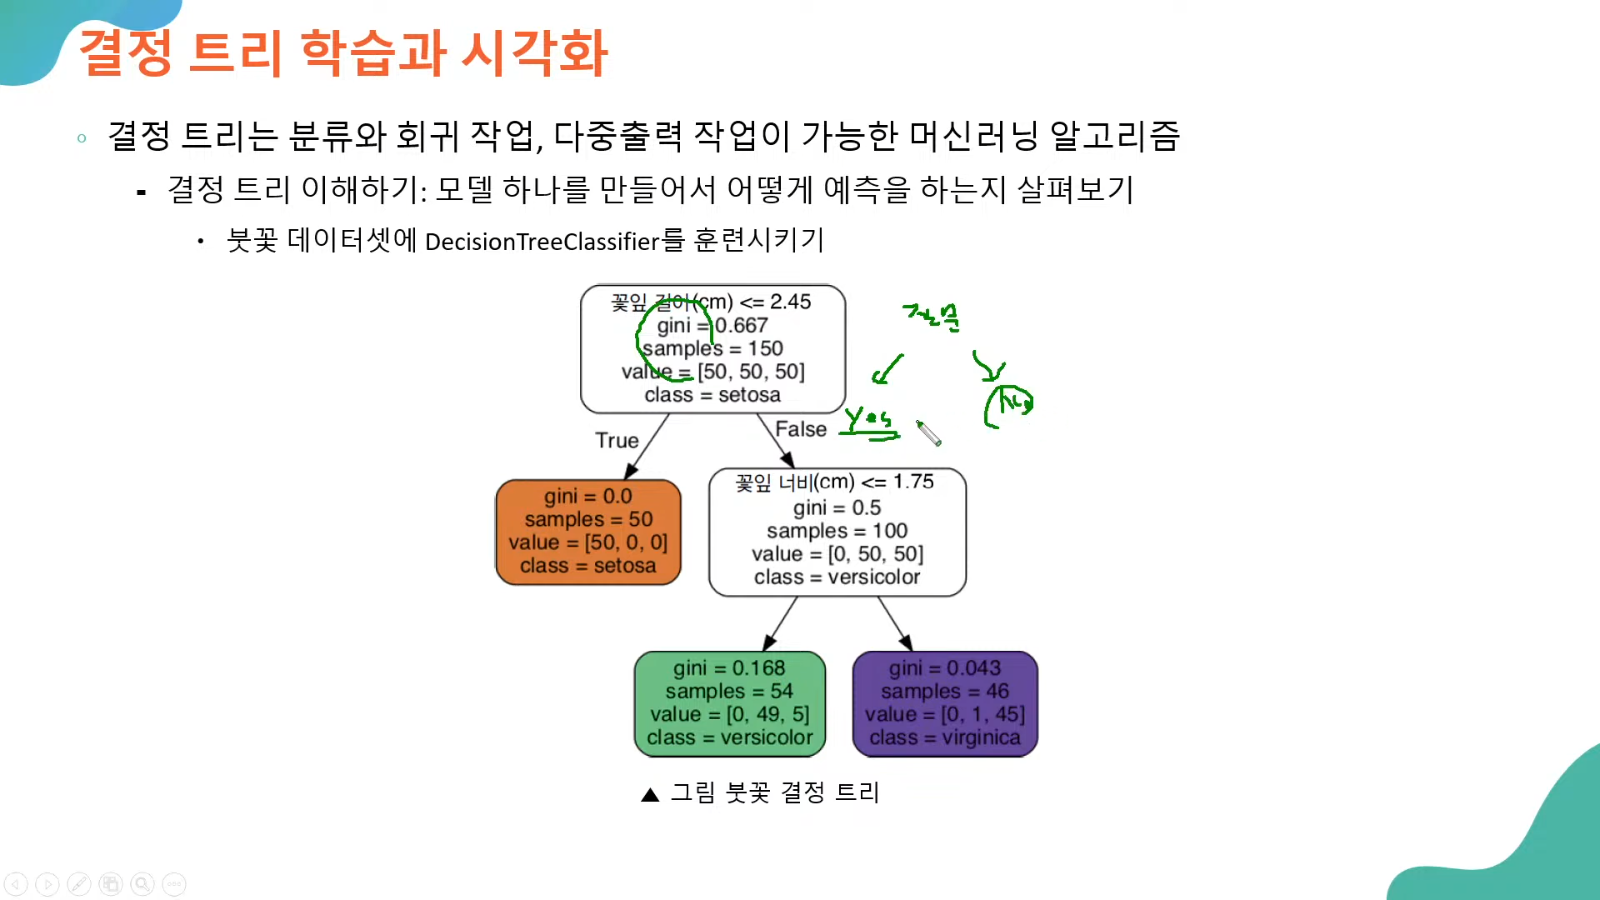

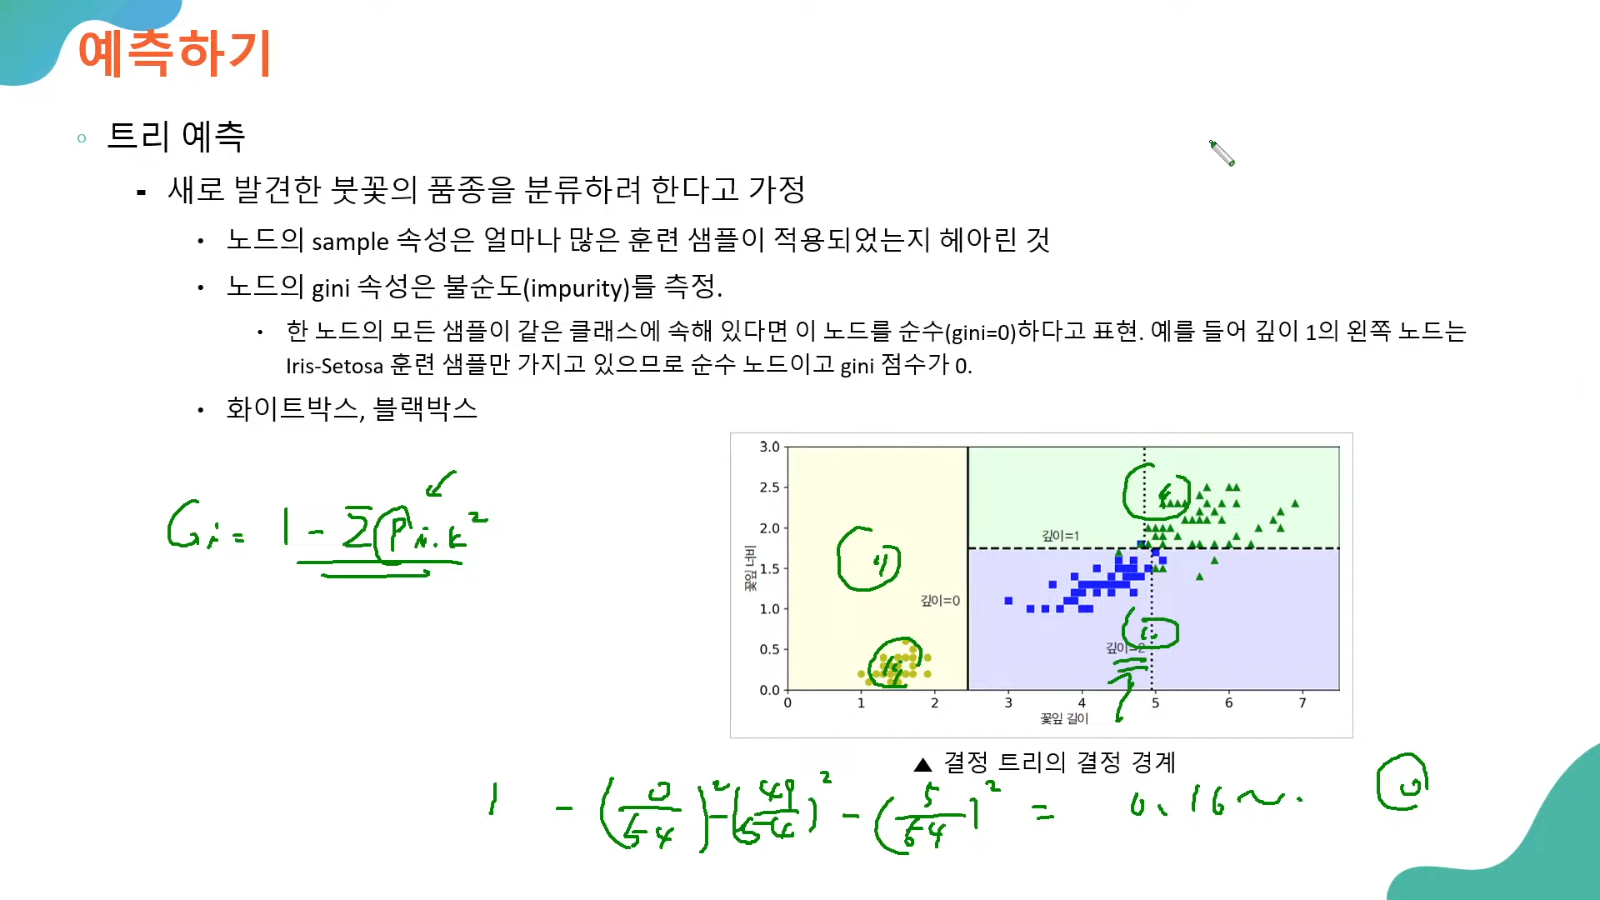

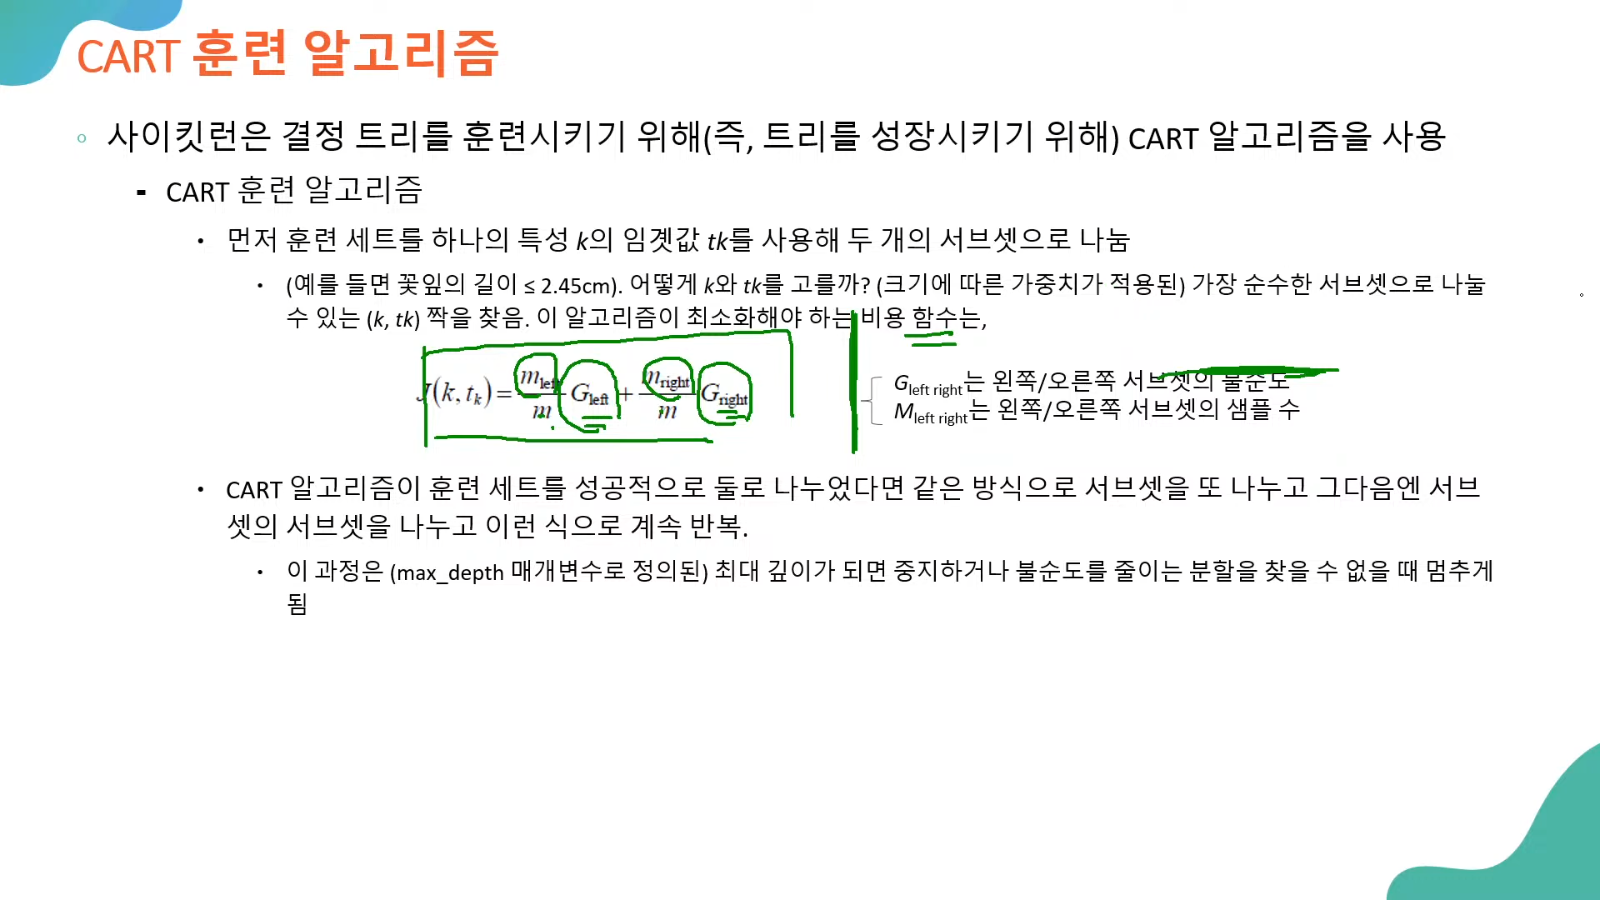

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [3]:
iris = load_iris()
x = iris.data[:, 2:] #  꽃잎의 길이, 너비 데이타를 X 변수로 이용
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(x, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [3]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0', '#ffbb00'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58', '#4c4c7f', '#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'yo', label='Iris setosa')
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'bs', label='Iris versicolor')
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], 'g^', label='Iris virginica')
        plt.axis(axes)
    if iris:
        plt.xlabel('Petal length', fontsize=14)
        plt.ylabel('Petal width', fontsize=14)
    else:
        plt.xlabel(r'$x_1$', fontsize=18)
        plt.ylabel(r'$x_2$', fontsize=18, rotation=0)
    if legend:
        plt.legend(loc='lower right', fontsize=14)

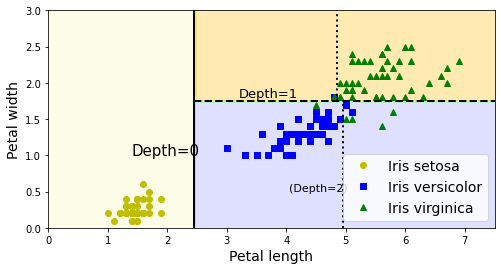

In [5]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, x, y, legend=True)
# Depth에 따른 구분 선 그리기
plt.plot([2.45, 2.45], [0, 3], 'k-', linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], 'k--', linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], 'k:', linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], 'k:', linewidth=2)
# Depth 명 나타내기
plt.text(1.4, 1, 'Depth=0', fontsize=15)
plt.text(3.2, 1.8, 'Depth=1', fontsize=13)
plt.text(4.05, 0.5, '(Depth=2)', fontsize=11)
plt.show()

## Decision Tree의 단점
 - 아래와 같은 형태의 데이타 분포에서 제한없이 분류를 하면 overfitting 됨, max_depth 나 min_samples_leaf 개수를 적당히 조절해줄 필요 있음

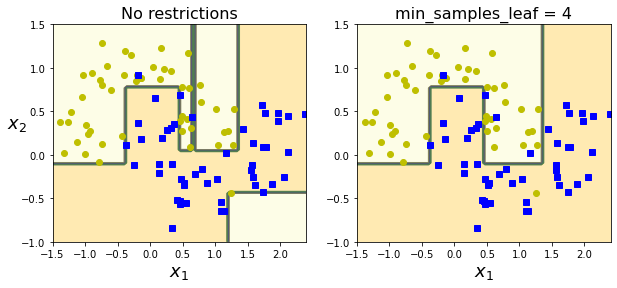

In [4]:
from sklearn.datasets import make_moons

xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53) # make moon 데이타로 2가지 형태의 Decision Tree 를 만들어 볼 것임, xm에는 2가지 data가 있고 ym은 2가지 값을 가지는 형태

deep_tree_clf1 = DecisionTreeClassifier(random_state=42) # 케이스1. 아무 제한 없이 Decision Tree 모델을 만듬
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(xm, ym)
deep_tree_clf2.fit(xm, ym)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4))
plt.sca(axes[0]) # matplotlib에서 그래프를 그릴 axis를 지정할 때 사용함
plot_decision_boundary(deep_tree_clf1, xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title('No restrictions', fontsize=16)

plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title('min_samples_leaf = {}'.format(deep_tree_clf2.min_samples_leaf), fontsize=16)
plt.ylabel('')
plt.show()

## Decision Tree Regressor
 * 데이터에서 나타나는 선형회귀값를 이용하여 Decision Tree에서 데이터를 분류하는 모델
 * 선형회귀값이라는 것이 예를 들면, x, y가 2차 함수의 관계에 있을 때 2차함수 곡선이 선형회귀 모델일텐데, 바로 이 2차함수를 경계선으로 데이터를 위/아래로 나누는 형태인 것 같다.

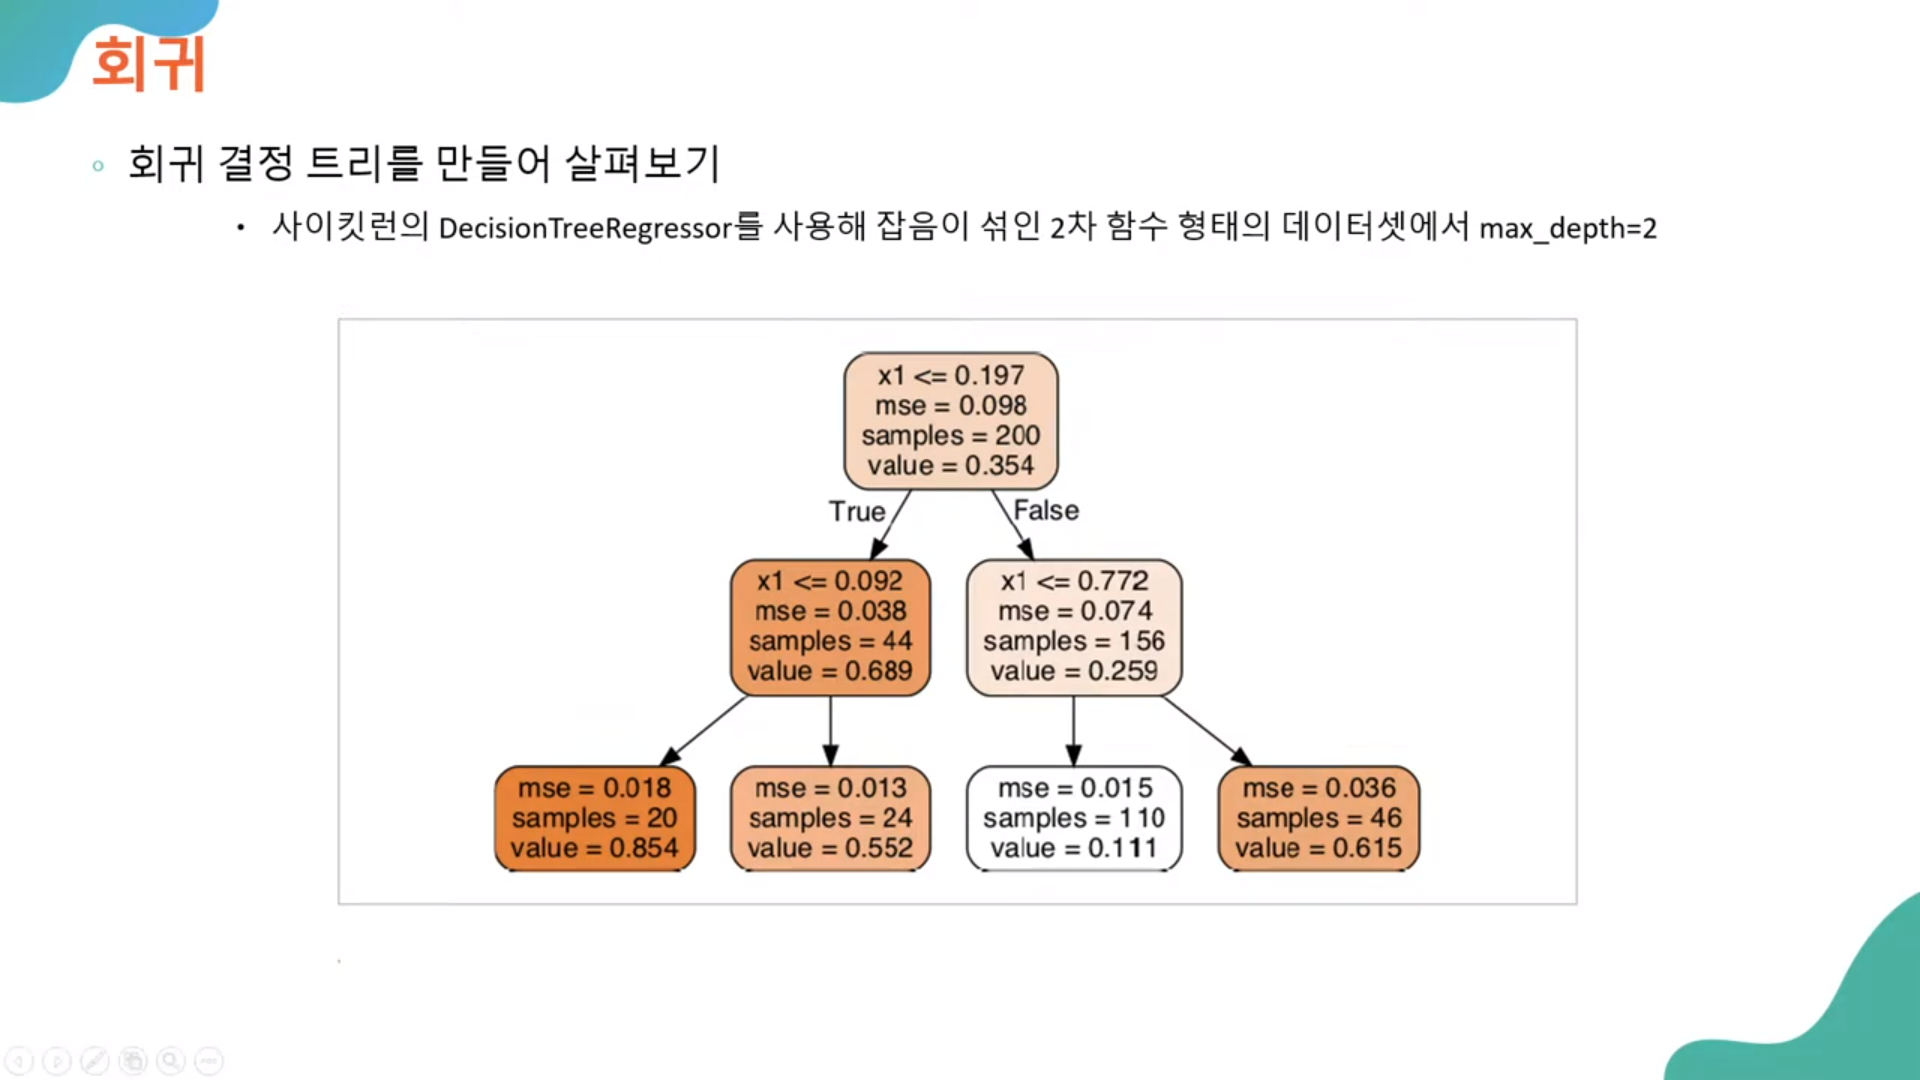

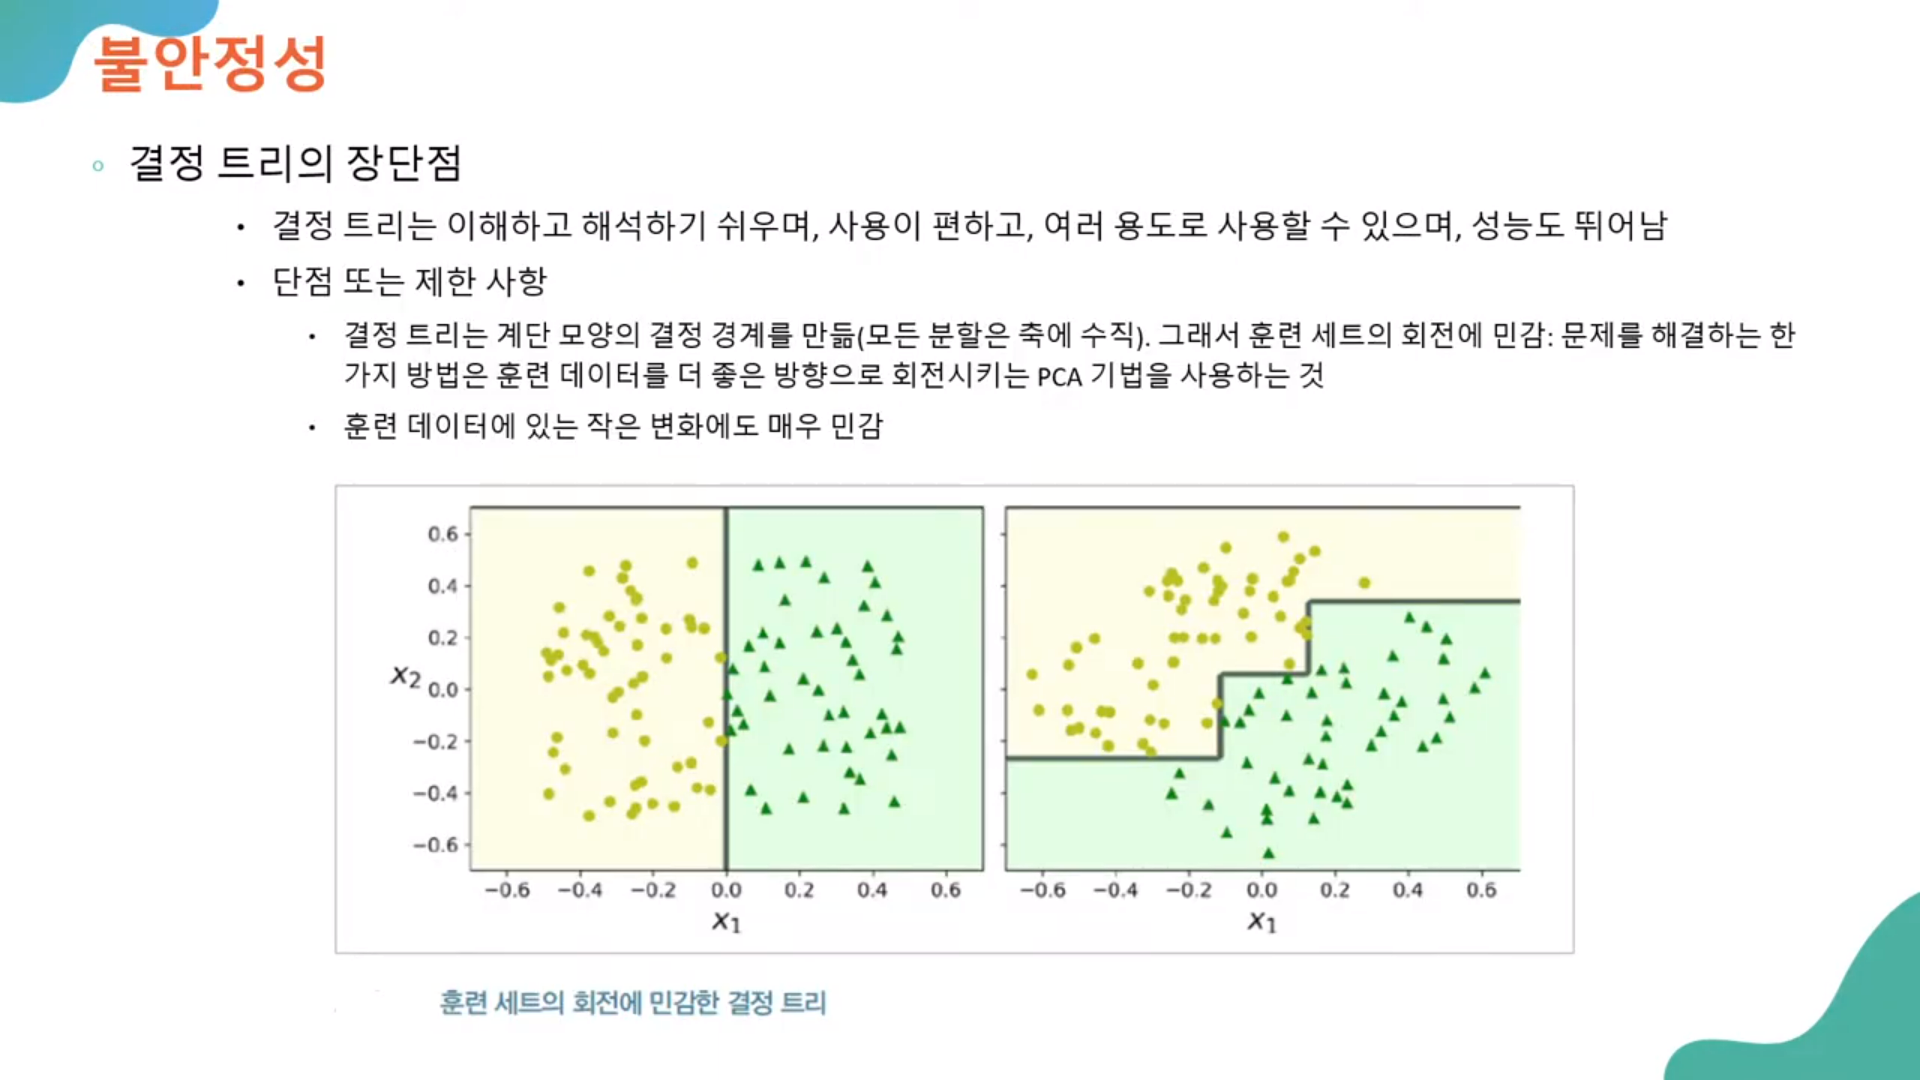

In [2]:
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
m = 200
x = np.random.rand(m, 1)
y = 4 * (x - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2 = DecisionTreeRegressor(max_depth=3, random_state=42)

tree_reg1.fit(x, y)
tree_reg2.fit(x, y)

DecisionTreeRegressor(max_depth=3, random_state=42)

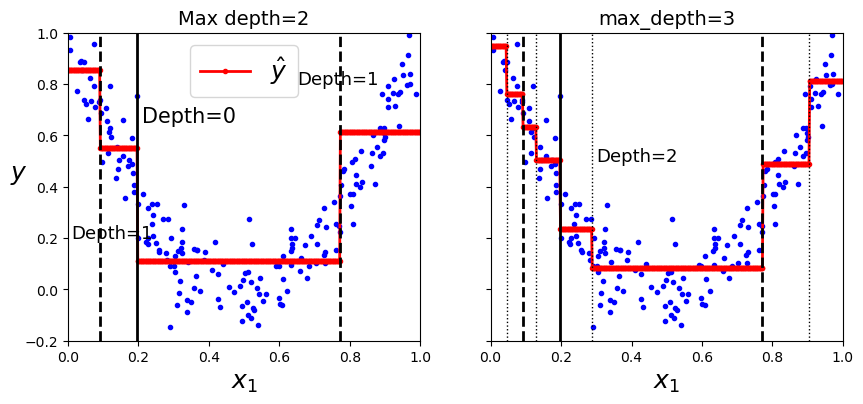

In [3]:
def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel='$y$'):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel('$x_1$', fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, 'b.')
    plt.plot(x1, y_pred, 'r.-', linewidth=2, label=r'$\hat{y}$')

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg1, x, y)
for split, style in ((0.1973, 'k-'), (0.0917, 'k--'), (0.7718, 'k--')):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, 'Depth=0', fontsize=15)
plt.text(0.01, 0.2, 'Depth=1', fontsize=13)
plt.text(0.65, 0.8, 'Depth=1', fontsize=13)
plt.legend(loc='upper center', fontsize=18)
plt.title('Max depth=2', fontsize=14)

plt.sca(axes[1])
plot_regression_predictions(tree_reg2, x, y, ylabel=None)
for split, style in ((0.1973, 'k-'), (0.0917, 'k--'), (0.7718, 'k--')):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], 'k:', linewidth=1)
plt.text(0.3, 0.5, 'Depth=2', fontsize=13)
plt.title('max_depth=3', fontsize=14)
plt.show()